In [1]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.7 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [3]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Computer Vision/lab-5 image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale

## Apply the 2D Discrete Wavelet Transform (DWT) to the given X-ray image to decompose it into frequency bands at two levels.

In [4]:
# Perform 2D DWT (first level)
coeffs1 = pywt.dwt2(image, 'haar')
LL1, (LH1, HL1, HH1) = coeffs1

# Perform 2D DWT on the LL1 band (second level)
coeffs2 = pywt.dwt2(LL1, 'haar')
LL2, (LH2, HL2, HH2) = coeffs2

In [5]:
def plot_subbands(LL, LH, HL, HH, level):
    plt.figure(figsize=(5, 5))

    plt.subplot(2, 2, 1)
    plt.imshow(LL, cmap='gray')
    plt.title(f'LL{level} (Low-Low)')

    plt.subplot(2, 2, 2)
    plt.imshow(LH, cmap='gray')
    plt.title(f'LH{level} (Low-High)')

    plt.subplot(2, 2, 3)
    plt.imshow(HL, cmap='gray')
    plt.title(f'HL{level} (High-Low)')

    plt.subplot(2, 2, 4)
    plt.imshow(HH, cmap='gray')
    plt.title(f'HH{level} (High-High)')

    plt.tight_layout()
    plt.show()

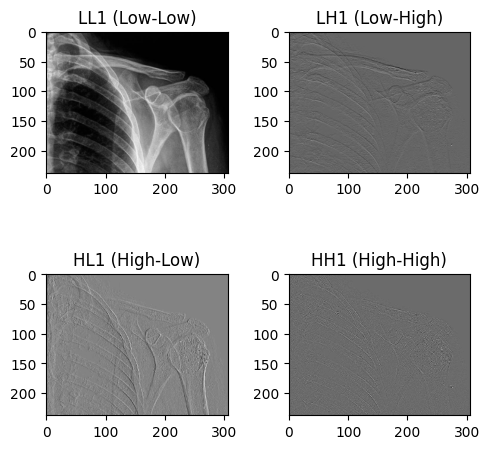

In [6]:
# Display Level 1 sub-bands
plot_subbands(LL1, LH1, HL1, HH1, level=1)

**LL1 (Low-Low):**

Approximation: Captures the overall, coarse details of the image. It focuses on low frequencies in both directions, resembling a blurred version of the original image.

**LH1 (Low-High):**

*Vertical Detail:* Emphasizes vertical edges by focusing on low-frequency horizontal and high-frequency vertical components.

**HL1 (High-Low):**

*Horizontal Detail:* Highlights horizontal edges by emphasizing high-frequency horizontal and low-frequency vertical components.

**HH1 (High-High):**

*Diagonal Detail:* Captures fine noise, sharp edges, and diagonal structures by focusing on high frequencies in both directions.


For Level 2, the sub-bands (LL2, LH2, HL2, HH2) further refine the details, offering a more subtle extraction of features at a finer scale.

Original Image resolution: (476, 612)
LL1 Image resolution: (238, 306)
LL2 Image resolution: (119, 153)


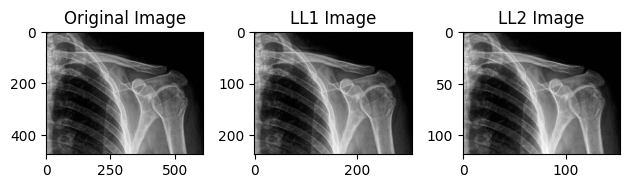

In [7]:
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
print("Original Image resolution:", image.shape)


plt.subplot(1, 3, 2)
plt.imshow(LL1, cmap='gray')
plt.title('LL1 Image')
print("LL1 Image resolution:", LL1.shape)


plt.subplot(1, 3, 3)
plt.imshow(LL2, cmap='gray')
plt.title('LL2 Image')
print("LL2 Image resolution:", LL2.shape)

plt.tight_layout()
plt.show()

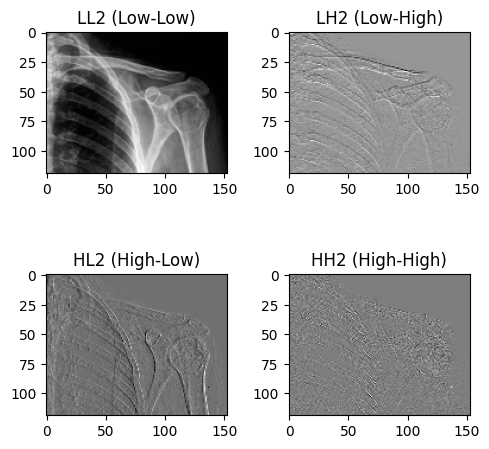

In [8]:
# Display Level 2 sub-bands
plot_subbands(LL2, LH2, HL2, HH2, level=2)

In [9]:
plt.figure(figsize=(15, 5))



<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

## Compare the frequency bands at both levels to observe resolution variation

● Discuss how the details presented in LL2, LH2, HL2, and HH2 compare to their Level 1 counterparts.

● Analyze how increasing the level of decomposition affects the visibility of subtle
features in the image.

**Level 1 vs. Level 2 Bands:**

*LL2 vs. LL1:* LL2 offers a smoother, more refined approximation of the image, capturing broader features with reduced noise.

*LH2 vs. LH1:* LH2 reveals more intricate vertical details, enhancing the visibility of subtle vertical features compared to LH1.

*HL2 vs. HL1:* HL2 captures finer horizontal structures, allowing better identification of subtle horizontal lines that may be lost in HL1.

*HH2 vs. HH1:* HH2 highlights even finer details and textures, improving clarity in detecting sharp edges and variations over HH1.